# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Data/fifa_players_22_cleaned.csv")
df

,Unnamed: 0,name,player_positions,best_position,overall,potential,value_eur,wage_eur,age,dob,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,0,L. Messi,"RW, ST, CF",RW,93,93,78000000.0,320000.0,34,1987-06-24,...,96,20,35,24,6,11,15,14,8,NaN
1,1,R. Lewandowski,ST,ST,92,92,119500000.0,270000.0,32,1988-08-21,...,88,35,42,19,15,6,12,8,10,NaN
2,2,Cristiano Ronaldo,"ST, LW",ST,91,91,45000000.0,270000.0,36,1985-02-05,...,95,24,32,24,7,11,15,14,11,NaN
3,3,Neymar Jr,"LW, CAM",LW,91,91,129000000.0,270000.0,29,1992-02-05,...,93,35,32,29,9,9,15,15,11,NaN
4,4,K. De Bruyne,"CM, CAM",CM,91,91,125500000.0,350000.0,30,1991-06-28,...,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,19069,R. Mahon,"LW, LM",ST,48,60,110000.0,500.0,18,2003-06-06,...,47,15,24,23,7,14,6,8,15,NaN
19000,19070,S. Black,CB,CB,48,62,100000.0,500.0,19,2002-03-01,...,44,50,49,47,5,6,7,13,10,NaN
19001,19071,H. Wiles-Richards,GK,GK,48,65,110000.0,1000.0,19,2002-05-27,...,23,9,12,13,52,49,49,43,48,33.0
19002,19072,J. Affonso,CM,CAM,48,55,90000.0,500.0,23,1998-06-09,...,35,39,42,44,8,11,11,9,10,NaN


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.columns

Index(['name', 'player_positions', 'best_position', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg',
       'club_name', 'league_name', 'league_level', 'club_position',
       'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggr

In [6]:
df.isna().sum()

name                           0
player_positions               0
best_position                  0
overall                        0
potential                      0
                           ...  
goalkeeping_handling           0
goalkeeping_kicking            0
goalkeeping_positioning        0
goalkeeping_reflexes           0
goalkeeping_speed          16910
Length: 67, dtype: int64

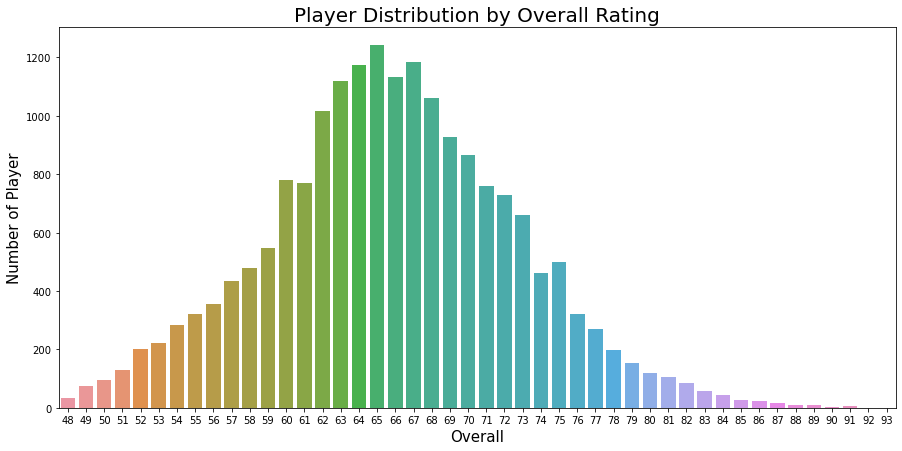

In [58]:
# Player Overall Rating Distribution"
plt.figure(figsize=(15,7))
ax = sns.countplot(x='overall', data=df)
ax.set_title('Player Distribution by Overall Rating', fontsize=20)
ax.set_xlabel('Overall', fontsize=15)
ax.set_ylabel('Number of Player', fontsize=15)
plt.show()

The FIFA players' overall rating shows a normal distribution with majority of players fall within 60-73 rating.

Comparing the each player attribute to the overall rating. Some attributes show bimodal distribution due to the player position difference.  

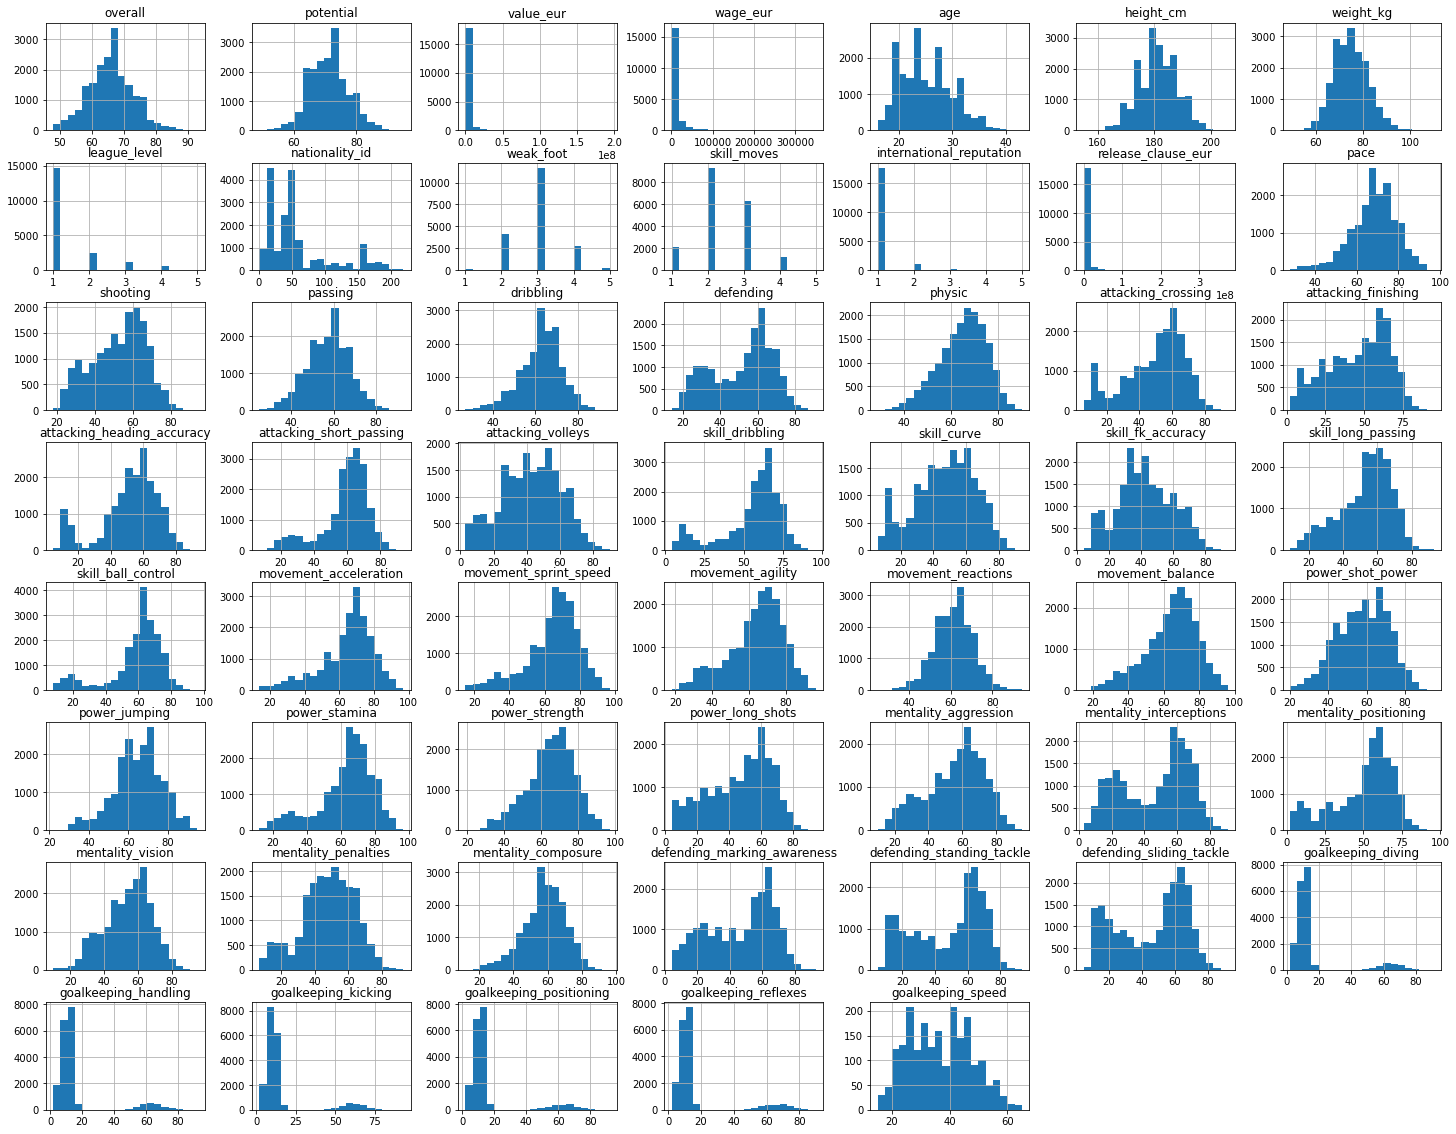

In [40]:
df.hist(bins=20, figsize=(25,20))
plt.show()

### Attributes that are showing bimodal distribution

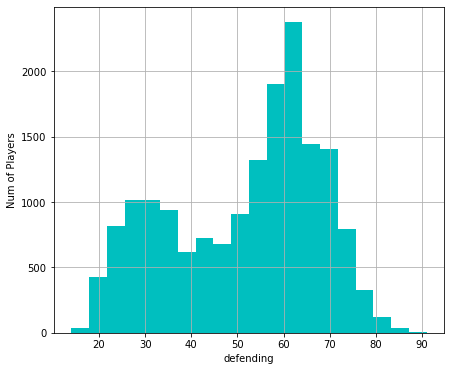

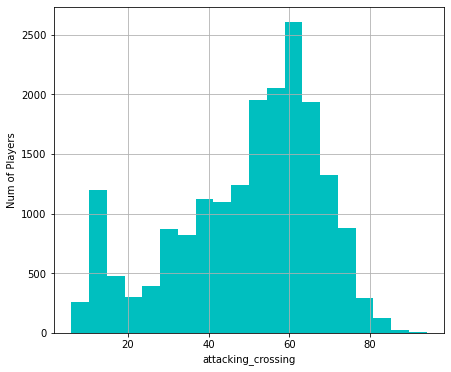

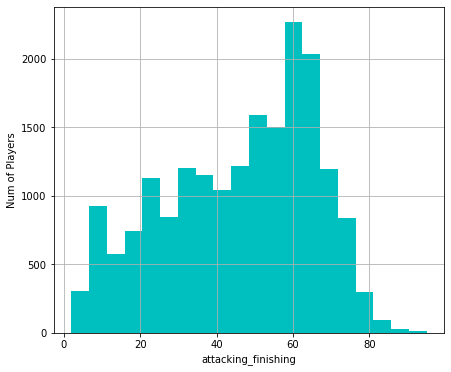

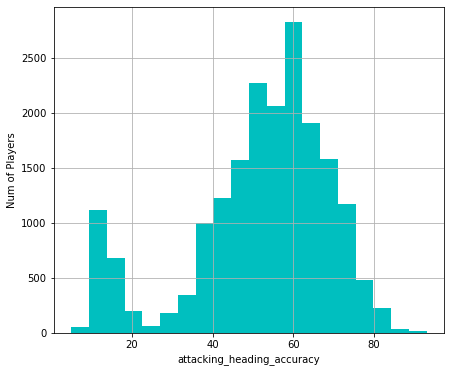

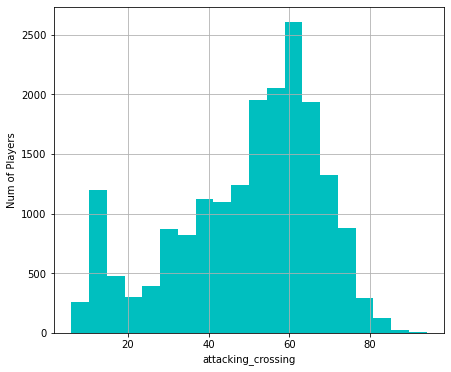

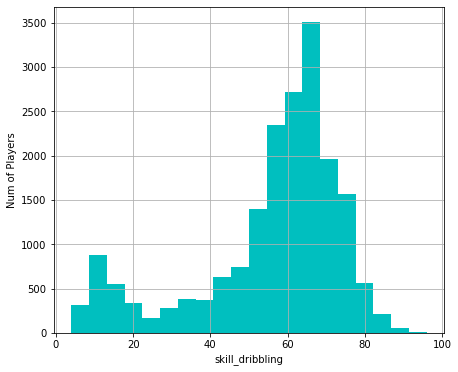

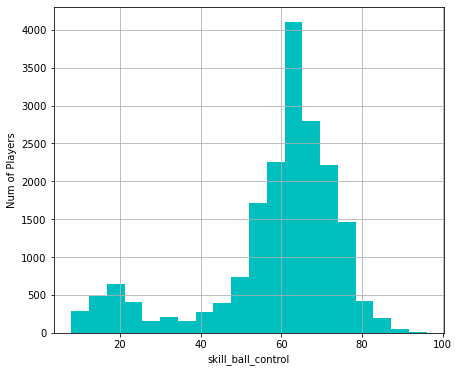

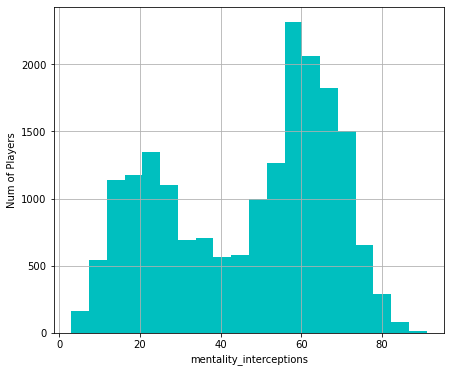

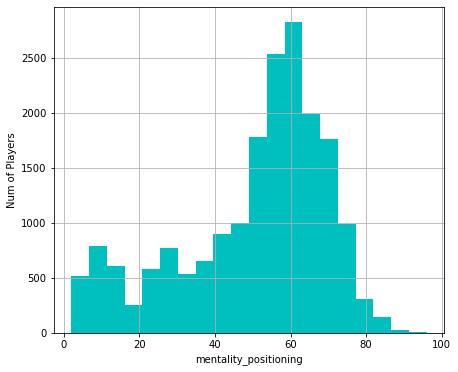

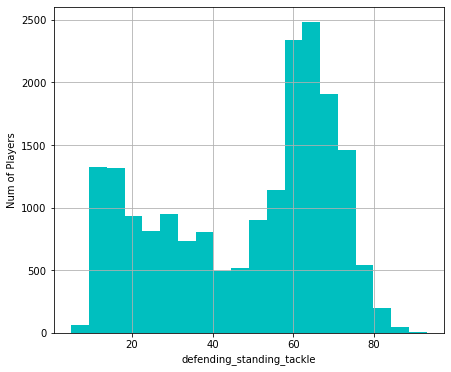

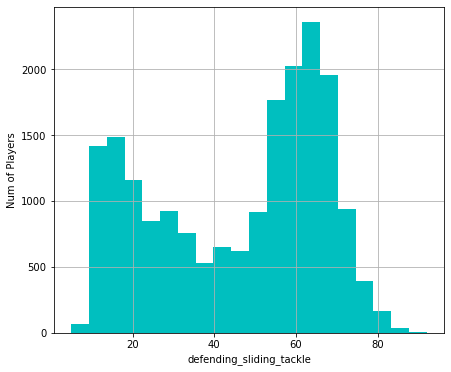

In [52]:
selected_stat = ['defending', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_crossing', 'skill_dribbling', 'skill_ball_control', 'mentality_interceptions', 'mentality_positioning', 'defending_standing_tackle', 'defending_sliding_tackle']

for i in selected_stat:
    df[i].hist(bins=20, figsize=(7,6), color='c')
    plt.xlabel(i)
    plt.ylabel('Num of Players')
    plt.show()

Grouping the field positions

In [9]:
# Separating data by positions (ATT, MID, DEF, GK)
pos_att = df[df['best_position'].isin(['CF', 'LW', 'RW', 'ST'])]
pos_mid = df[df['best_position'].isin(['CAM','CDM', 'CM', 'LM', 'RM'])]
pos_def = df[df['best_position'].isin(['CB', 'LB', 'LWB', 'RB', 'RWB'])]
pos_gk = df[df['best_position'].isin(['GK'])]

# Combining all positions except GK
all_pos_wo_gk = pd.concat([pos_att, pos_mid, pos_def])

Below plots show which positions are distributed based on specifict player attributes.

Ex. The attacking positions show higher "finishing" rating vs. the defending positions.

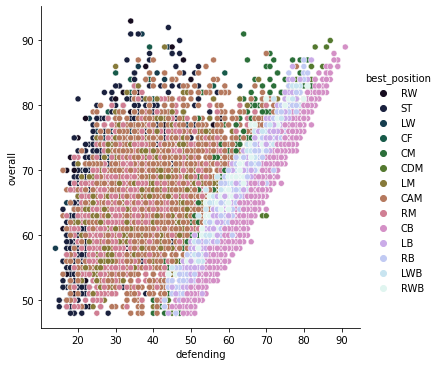

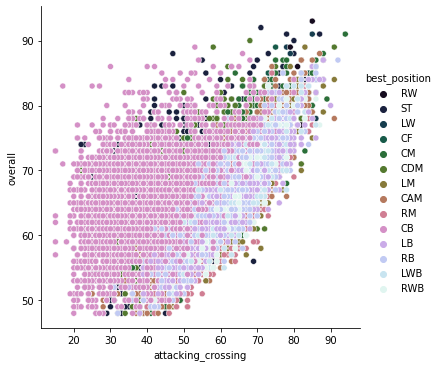

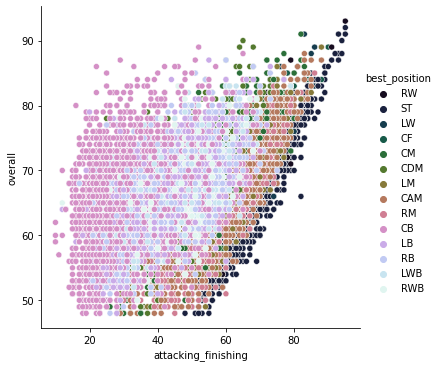

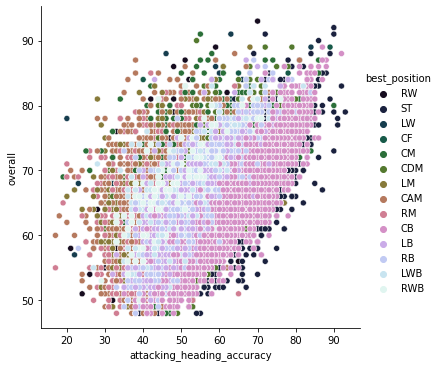

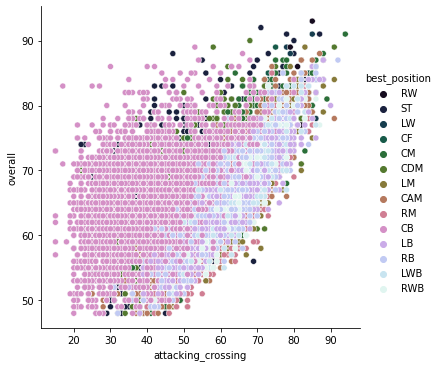

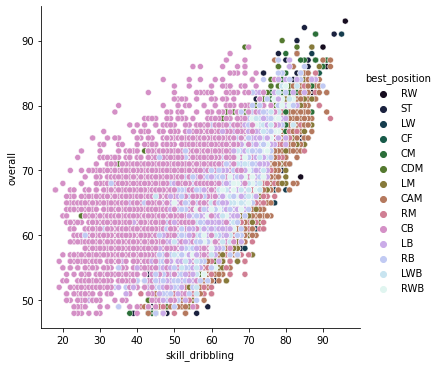

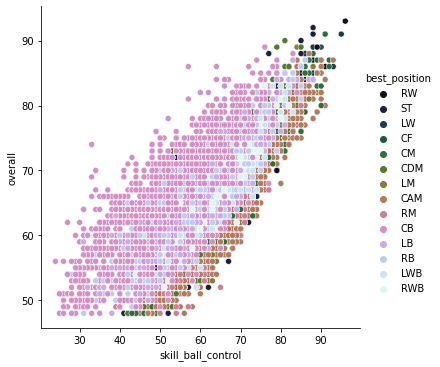

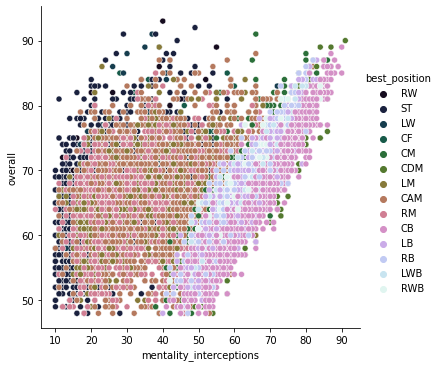

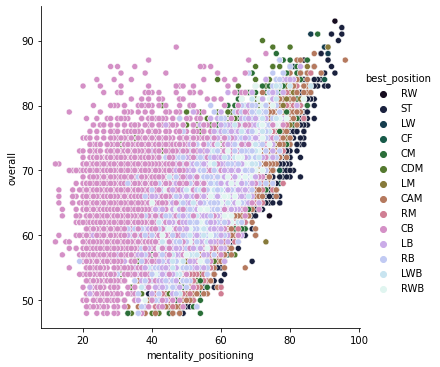

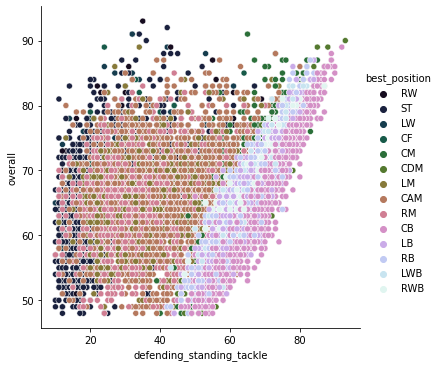

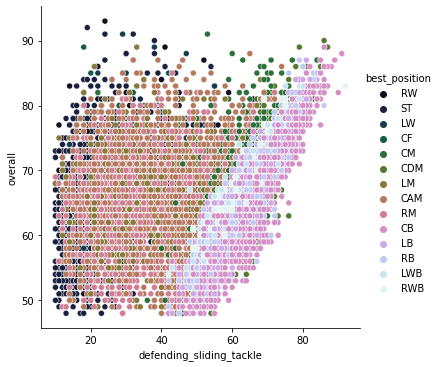

In [51]:
# Plotting bimodal distribution
selected_stat = ['defending', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_crossing', 'skill_dribbling', 'skill_ball_control', 'mentality_interceptions', 'mentality_positioning', 'defending_standing_tackle', 'defending_sliding_tackle']

for i in selected_stat:
    sns.relplot(data=all_pos_wo_gk, x=i, y='overall', hue= 'best_position', palette='cubehelix')

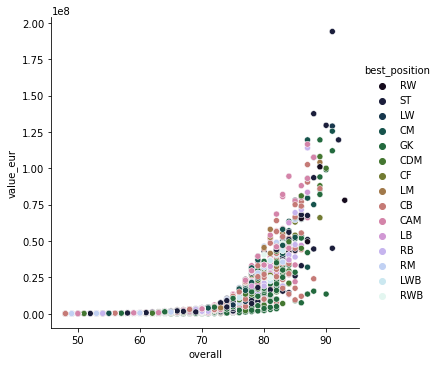

In [12]:
sns.relplot(data=df, x='overall', y='value_eur', hue= 'best_position', palette='cubehelix')

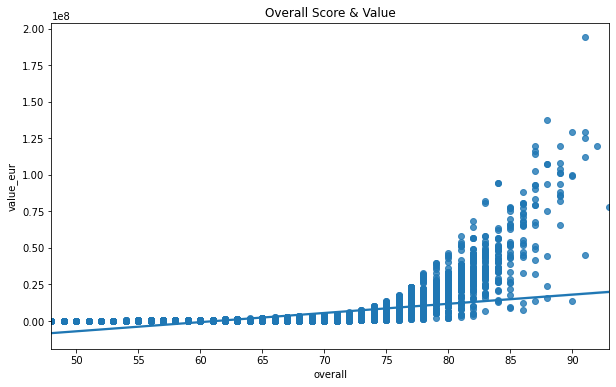

In [13]:
plt.figure(figsize=(10,6))
sns.regplot(x="overall",y="value_eur",data=df).set(title='Overall Score & Value')
plt.show()

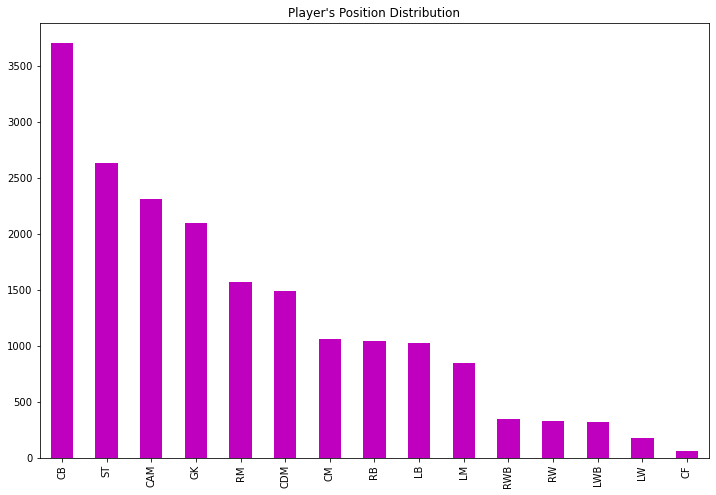

In [61]:
# Player Position Distribution
plt.figure(figsize=(12,8))
pos=df['best_position'].value_counts()
pos.plot(kind='bar', fontsize=10, subplots=True, color='m')
plt.title("Player's Position Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

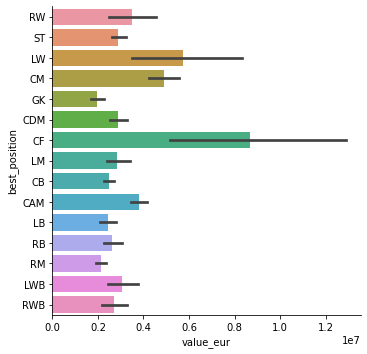

In [30]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="best_position", x="value_eur", kind="bar",  data=df)
plt.show()

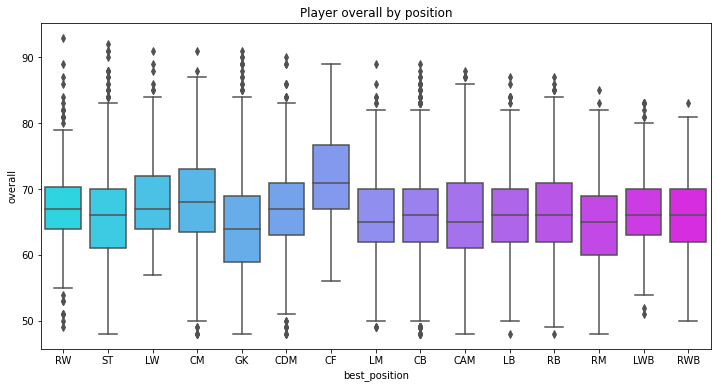

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x ='best_position', 
            y ='overall', 
            data = df, 
            palette ='cool'
           ).set_title('Player overall by position');

- All the GKs are missing the the player attributes (pace, shooting, passing, dribbling, defending) due to their position.
- All the players, except GK, are missing the goalkeeping speed due to their positions.  

In [18]:
df.corr()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,nationality_id,weak_foot,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
overall,1.000000,0.645636,0.559877,0.604627,0.448490,0.039534,0.144407,-0.181072,-0.165874,0.220440,...,0.707103,0.310122,0.258888,0.232790,-0.012758,-0.012148,-0.014822,-0.003933,-0.009174,0.492105
potential,0.645636,1.000000,0.530965,0.499848,-0.275813,0.002301,-0.021344,-0.155582,-0.245271,0.156001,...,0.427752,0.161322,0.157120,0.141510,-0.045465,-0.046767,-0.049492,-0.042185,-0.044523,0.225851
value_eur,0.559877,0.530965,1.000000,0.824668,0.038462,0.010097,0.033645,-0.119342,-0.083900,0.149855,...,0.391034,0.141090,0.120993,0.103724,-0.022372,-0.022587,-0.021748,-0.021301,-0.020012,0.203426
wage_eur,0.604627,0.499848,0.824668,1.000000,0.153917,0.028719,0.065084,-0.127278,-0.092606,0.159433,...,0.437105,0.168540,0.144285,0.125530,-0.023889,-0.023838,-0.023948,-0.022400,-0.022155,0.280501
age,0.448490,-0.275813,0.038462,0.153917,1.000000,0.081212,0.237077,-0.052328,0.063626,0.076525,...,0.348128,0.159619,0.099332,0.087435,0.110693,0.113854,0.113217,0.121610,0.112969,0.394134
height_cm,0.039534,0.002301,0.010097,0.028719,0.081212,1.000000,0.765849,0.067365,-0.154578,-0.158098,...,-0.163133,-0.089927,-0.096892,-0.097327,0.369848,0.367396,0.365582,0.367117,0.367451,-0.044138
weight_kg,0.144407,-0.021344,0.033645,0.065084,0.237077,0.765849,1.000000,0.015237,-0.122572,-0.117093,...,-0.069821,-0.065908,-0.083892,-0.086449,0.342638,0.340869,0.340755,0.343916,0.342982,0.062402
league_level,-0.181072,-0.155582,-0.119342,-0.127278,-0.052328,0.067365,0.015237,1.000000,-0.263384,-0.014400,...,-0.102207,-0.035672,-0.034957,-0.033411,-0.013818,-0.011441,-0.016117,-0.014380,-0.014518,0.002600
nationality_id,-0.165874,-0.245271,-0.083900,-0.092606,0.063626,-0.154578,-0.122572,-0.263384,1.000000,0.013370,...,-0.112137,-0.043993,-0.045254,-0.042581,-0.020683,-0.023281,-0.020723,-0.022984,-0.021660,-0.037797
weak_foot,0.220440,0.156001,0.149855,0.159433,0.076525,-0.158098,-0.117093,-0.014400,0.013370,1.000000,...,0.305857,0.064098,0.039157,0.021229,-0.219467,-0.220224,-0.213938,-0.217353,-0.220907,0.135485


In [19]:
df.columns

Index(['name', 'player_positions', 'best_position', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg',
       'club_name', 'league_name', 'league_level', 'club_position',
       'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggr

## Selecting Features

In [20]:
# Selecting player features
player_df = df[['overall', 'potential', 'age', 'height_cm', 'weight_kg', 'weak_foot',
       'skill_moves', 'international_reputation',
       'attacking_crossing', 'attacking_finishing','attacking_heading_accuracy', 
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

player_df

,overall,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,attacking_crossing,attacking_finishing,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,93,93,34,170,72,4,4,5,85,95,...,75,96,20,35,24,6,11,15,14,8
1,92,92,32,185,81,4,4,5,71,95,...,90,88,35,42,19,15,6,12,8,10
2,91,91,36,187,83,4,5,5,87,95,...,88,95,24,32,24,7,11,15,14,11
3,91,91,29,175,68,5,5,5,85,83,...,93,93,35,32,29,9,9,15,15,11
4,91,91,30,181,70,5,4,4,94,82,...,83,89,68,65,53,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,48,60,18,168,58,3,2,1,40,52,...,46,47,15,24,23,7,14,6,8,15
19000,48,62,19,180,75,3,2,1,28,23,...,37,44,50,49,47,5,6,7,13,10
19001,48,65,19,180,72,2,1,1,12,5,...,16,23,9,12,13,52,49,49,43,48
19002,48,55,23,172,72,3,2,1,40,29,...,35,35,39,42,44,8,11,11,9,10


In [21]:
# features left out - 'best_position', 'value_eur', 'work_rate', 'body_type'

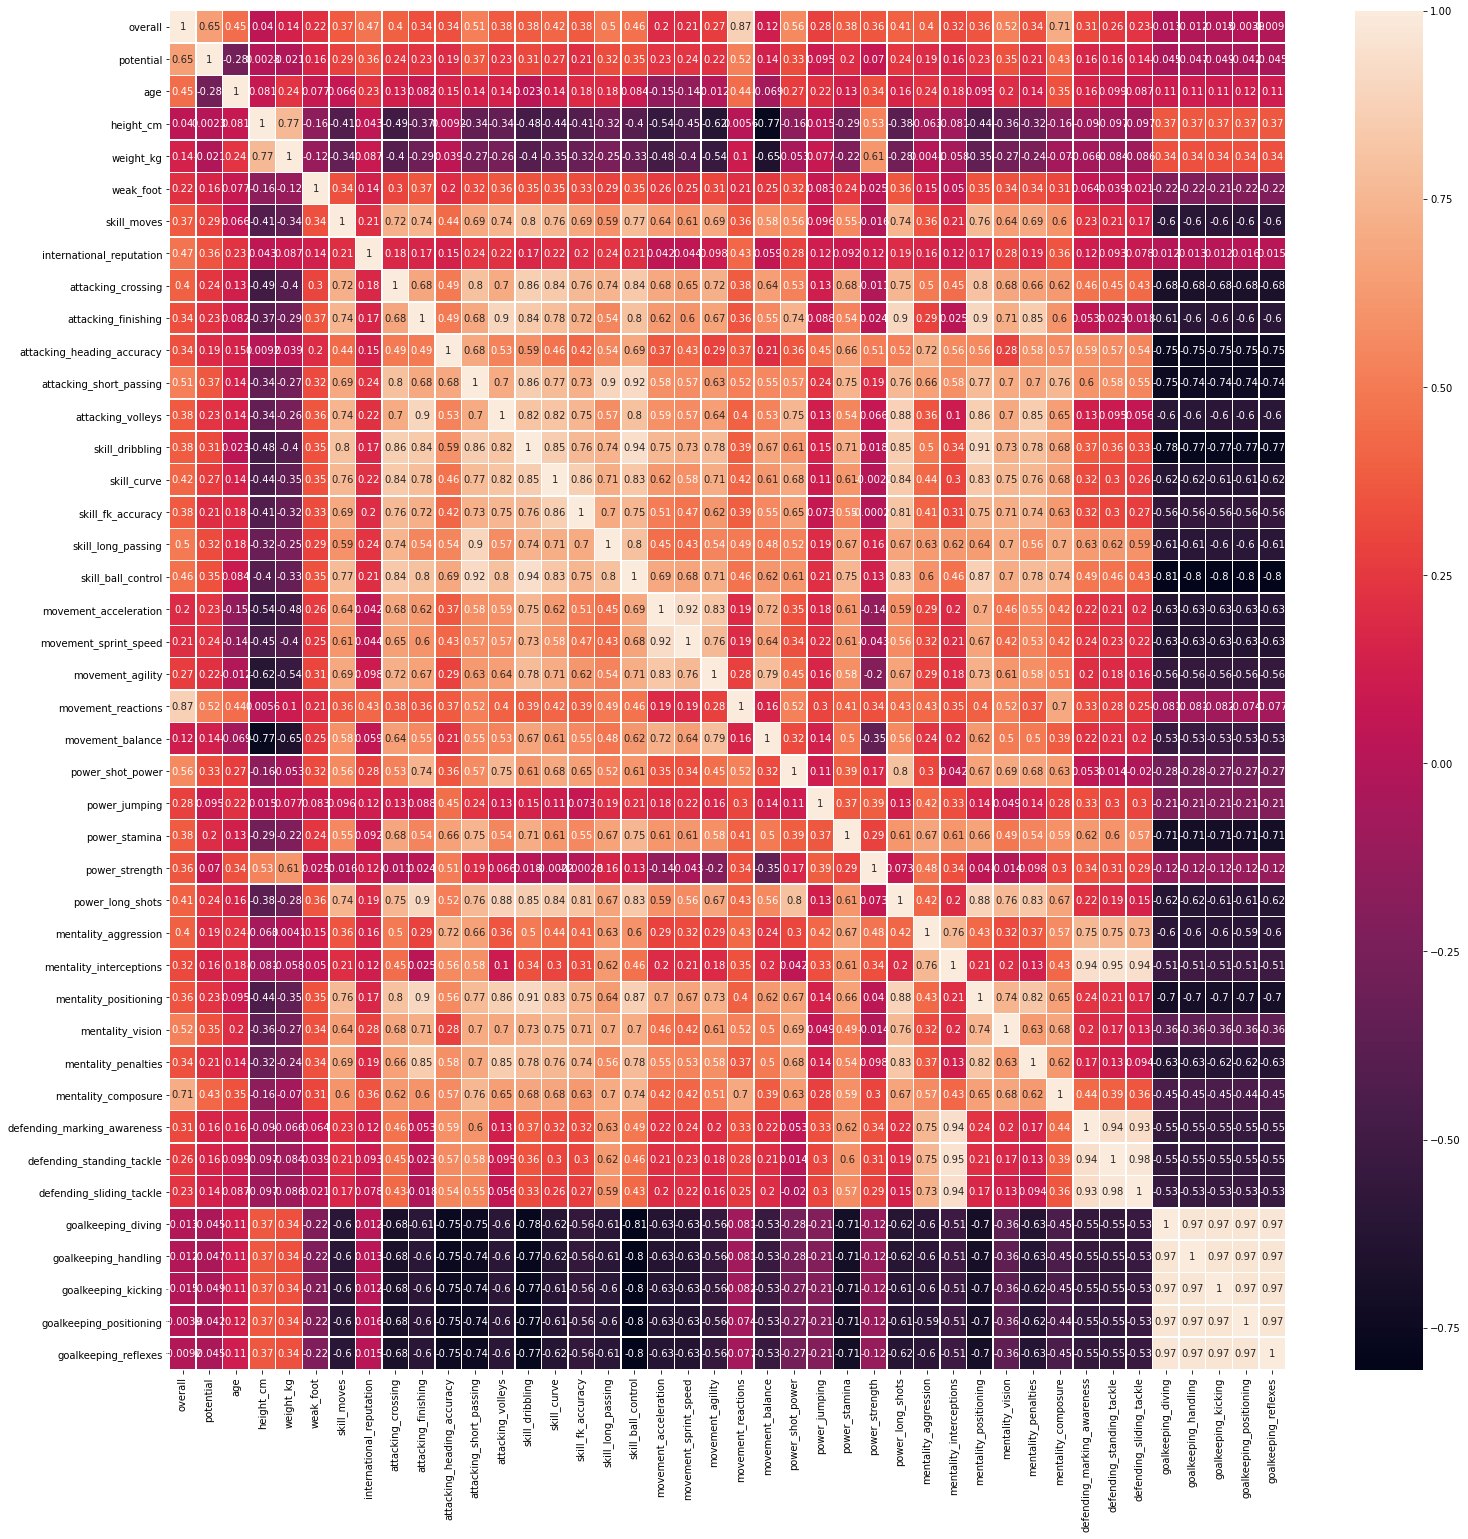

<Figure size 432x288 with 0 Axes>

In [22]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(player_df.corr(), linewidths=0.5, annot=True)
plt.show()
plt.clf()

Selected features show low pvalue, thus these features are statistically significant. 

In [23]:
from scipy import stats

corr_df = pd.DataFrame(columns=['r', 'p_val'])

for col in player_df:
    r, p_val = stats.pearsonr(player_df.overall, df[col])
    corr_df.loc[col] = [r, p_val]

corr_df

,r,p_val
overall,1.000000,0.000000e+00
potential,0.645636,0.000000e+00
age,0.448490,0.000000e+00
height_cm,0.039534,4.988460e-08
weight_kg,0.144407,4.433498e-89
weak_foot,0.220440,7.497145e-208
skill_moves,0.374718,0.000000e+00
international_reputation,0.471298,0.000000e+00
attacking_crossing,0.398741,0.000000e+00
attacking_finishing,0.335393,0.000000e+00


In [24]:
# Top 10 attributes with high correlation to overall
corr_df.sort_values('r', ascending=False)[1:11]


,r,p_val
movement_reactions,0.871605,0.0
mentality_composure,0.707103,0.0
potential,0.645636,0.0
power_shot_power,0.556557,0.0
mentality_vision,0.520459,0.0
attacking_short_passing,0.514821,0.0
skill_long_passing,0.495840,0.0
international_reputation,0.471298,0.0
skill_ball_control,0.458430,0.0
age,0.448490,0.0


In [25]:
# Saving the cleaned data for modeling
player_df.to_csv("fifa_players_data_for_models.csv")

### Top 5 skill attributes

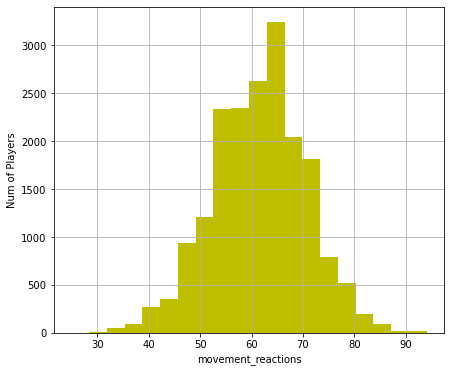

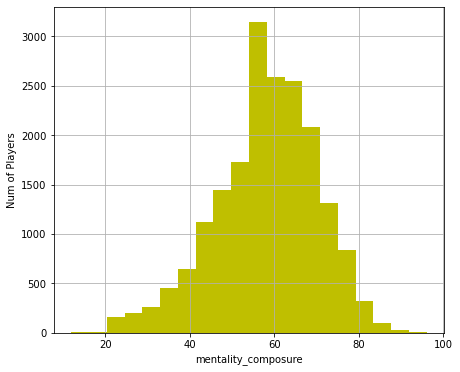

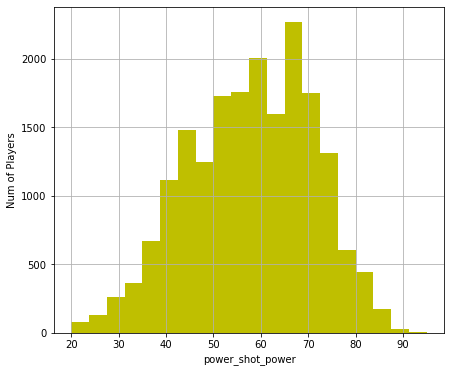

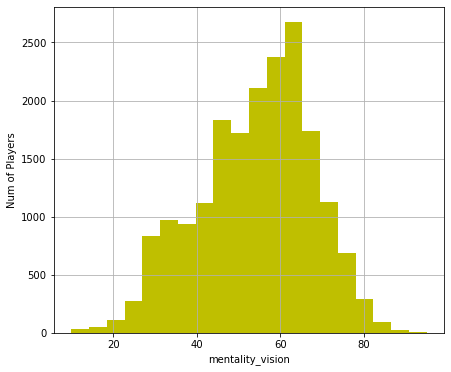

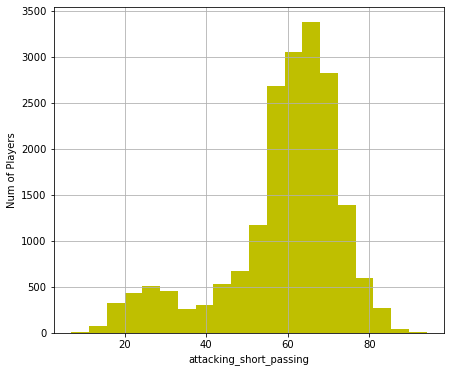

In [55]:
top5 = ['movement_reactions', 'mentality_composure', 'power_shot_power', 'mentality_vision', 'attacking_short_passing']

for i in top5:
    df[i].hist(bins=20, figsize=(7,6), color='y')
    plt.xlabel(i)
    plt.ylabel('Num of Players')
    plt.show()


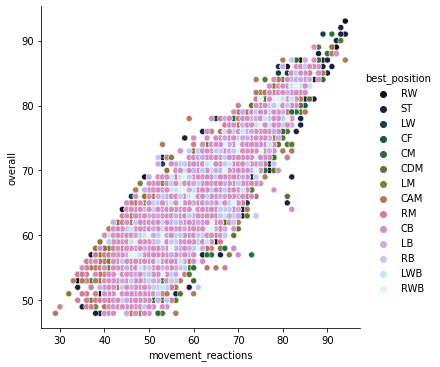

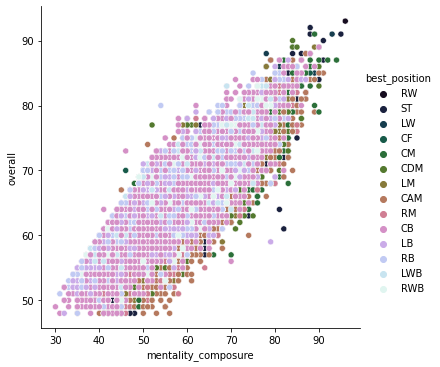

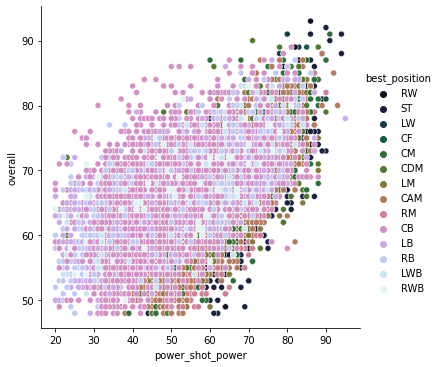

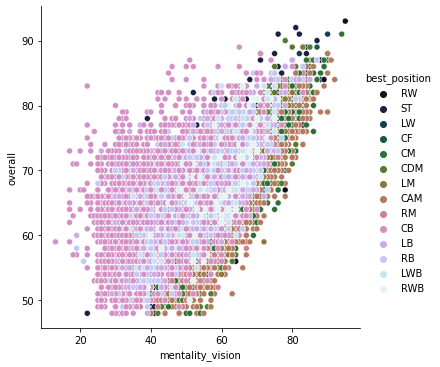

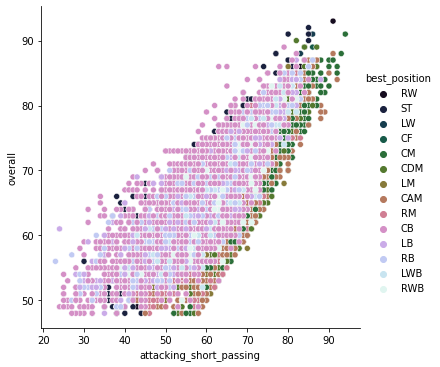

In [56]:
top5 = ['movement_reactions', 'mentality_composure', 'power_shot_power', 'mentality_vision', 'attacking_short_passing']

for i in top5:
    sns.relplot(data=all_pos_wo_gk, x=i, y='overall', hue= 'best_position', palette='cubehelix')